<a href="https://colab.research.google.com/github/shivankb/Yes-Bank-Stock-Closing-Price-Prediction/blob/master/yes_bank_stock_closing_price_prediction_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Yes Bank Stock Closing Price Prediction

#Project Summary

**Yes Bank** is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

#Dataset description
1. Date - Date of record
2. Open - Opening Price
3. High - Highest price in the day
4. Low - Lowest price in the day
5. Close - Price at the end of the day

## ***Know Your Data***

## Import Libraries and Dataset Loading

In [107]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [108]:
# Mounting the Drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
# Load Dataset

YesBank_df = pd.read_csv(r"/content/drive/MyDrive/Yes Bank ML-Regression/data_YesBank_StockPrices.csv")


##Understanding the data

###Dataset first view

In [110]:
YesBank_df.head(3)

Date   Open   High    Low  Close
0  Jul-05  13.00  14.00  11.25  12.46
1  Aug-05  12.58  14.88  12.55  13.42
2  Sep-05  13.48  14.87  12.27  13.30

In [111]:
YesBank_df.tail(3)

Date   Open   High    Low  Close
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

### Dataset Rows & Columns count

In [112]:
# Dataset Rows & Columns count

YesBank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [113]:
YesBank_df.shape

(185, 5)

### Dataset Information

In [114]:
# Dataset Info

YesBank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Missing Values/Null Values

In [115]:
# Missing Values/Null Values Count

YesBank_df.describe()

Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.550000   58.000000   62.540000
75%    153.000000  169.190000  138.350000  153.300000
max    369.950000  404.000000  345.500000  367.900000

In [116]:
YesBank_df.describe(include="all")

Date        Open        High         Low       Close
count      185  185.000000  185.000000  185.000000  185.000000
unique     185         NaN         NaN         NaN         NaN
top     Jul-05         NaN         NaN         NaN         NaN
freq         1         NaN         NaN         NaN         NaN
mean       NaN  105.541405  116.104324   94.947838  105.204703
std        NaN   98.879850  106.333497   91.219415   98.583153
min        NaN   10.000000   11.240000    5.550000    9.980000
25%        NaN   33.800000   36.140000   28.510000   33.450000
50%        NaN   62.980000   72.550000   58.000000   62.540000
75%        NaN  153.000000  169.190000  138.350000  153.300000
max        NaN  369.950000  404.000000  345.500000  367.900000

In [117]:
YesBank_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [118]:
#Writing a define function to obtain variable, dtypes,count,unique,duplicate,missing values in a single dataframe
def show_missing(df):
   
    
    variables = []
    dtypes = []
    count = []
    unique = []
    duplicate = []
    missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        duplicate.append(df.duplicated().sum())
        missing.append(df[item].isna().sum())
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'duplicate' : duplicate,
        'missing': missing, 
        
    })    
        
    return output

In [119]:
show_missing(YesBank_df)

variable    dtype  count  unique  duplicate  missing
0     Date   object    185     185          0        0
1     Open  float64    185     183          0        0
2     High  float64    185     184          0        0
3      Low  float64    185     183          0        0
4    Close  float64    185     185          0        0

Text(0.5, 6.79999999999999, 'Closing Price')

<Figure size 1080x720 with 0 Axes>

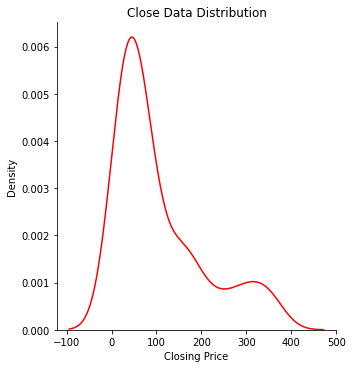

In [120]:
# Dependent variable 'Closing price'

plt.figure(figsize=(15,10))
sns.displot(YesBank_df['Close'],color="r",kind ='kde')
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')

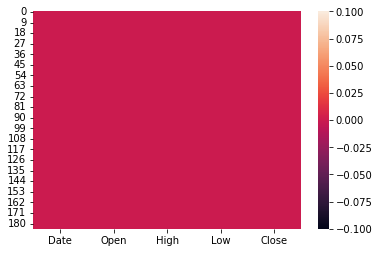

In [121]:
# Checking Null Value by plotting Heatmap
sns.heatmap(YesBank_df.isnull())

### What did you know about your dataset?



1.   From the given dataset we  were able to understand that there are total of 5 columns and 185 rows and among those there are 4 columns with Data Type Float and single column with Object datatype.
2.   There were Niether Missing/Null values nor duplicate values in the dataset,to be specific the dataset is clean.



##Data Wrangling

In [122]:
# Imorting libraries
from datetime import datetime
import datetime as dt

#Creating date format and new month column

YesBank_df['date_new']=YesBank_df['Date'].apply(lambda x : datetime.strptime(x,'%b-%y'))
YesBank_df["Month"]=YesBank_df["date_new"].apply(lambda x : datetime.strftime(x, '%B'))
YesBank_df["Year"]=YesBank_df["date_new"].apply(lambda x : datetime.strftime(x, '%Y'))

In [123]:
YesBank_df.sample(1)

Date  Open  High   Low  Close   date_new Month  Year
178  May-20  27.8  31.6  25.2  26.85 2020-05-01   May  2020

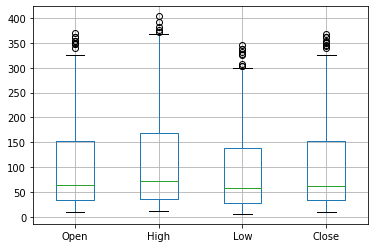

In [124]:
YesBank_df.boxplot()

In [125]:
# Stock Opening mean price as on month
month_vs_open=YesBank_df.groupby(['Month'])["Open"].mean().reset_index()
month_vs_open

Month        Open
0       April  113.044000
1      August  108.481875
2    December  100.850000
3    February  109.134667
4     January  100.928000
5        July  103.891250
6        June  113.268000
7       March  108.150667
8         May  114.589333
9    November   97.975000
10    October   93.815625
11  September  103.691875

**Findings:**


*   The minimum stock opening mean price is 93.81 which is in the month of October.
*   The maximum stock opening mean price is 114.81 which is in the month of May.


In [126]:
#  Stocks Higher mean price as on month
month_vs_high=YesBank_df.groupby(['Month'])["High"].mean().reset_index()
month_vs_high

Month        High
0       April  125.709333
1      August  116.064375
2    December  107.654000
3    February  116.035333
4     January  117.346667
5        July  117.493750
6        June  118.471333
7       March  123.670667
8         May  122.090000
9    November  105.645000
10    October  109.928125
11  September  114.283750

**Findings:**

*   The minimum stock high mean price is 105.81 which is in the month of November.
*   The maximum stock high mean price is 125.81 which is in the month of April.

In [127]:
# Stocks Lower mean price as on month 
month_vs_low=YesBank_df.groupby(['Month'])["Low"].mean().reset_index()
month_vs_low

Month         Low
0       April  102.284667
1      August   95.777500
2    December   92.808000
3    February   98.238667
4     January   93.766000
5        July   96.206250
6        June  102.642000
7       March   98.524000
8         May  102.404667
9    November   87.251875
10    October   85.361875
11  September   85.735625

**Findings:**

*   The minimum stock low mean price is 85.36 which is in the month of October.
*   The maximum stock low mean price is 102.64 which is in the month of June.

In [128]:
# Stocks closing mean price as on month
month_vs_close=YesBank_df.groupby(['Month'])["Close"].mean().reset_index()
month_vs_close

Month       Close
0       April  114.450000
1      August  103.386875
2    December  100.724000
3    February  107.760667
4     January  108.774667
5        July  108.322500
6        June  109.661333
7       March  113.014000
8         May  112.874667
9    November   94.671250
10    October   97.399375
11  September   93.343750

In [129]:
# stocks opening, closing, higher, lower median price as on month
df_median=YesBank_df.groupby(['Month' ]).median()
df_median

Open    High     Low   Close
Month                                    
April      73.620  76.100  69.110  70.070
August     64.450  68.345  51.830  57.555
December   70.000  70.500  55.440  62.540
February   61.540  62.700  58.420  60.950
January    62.980  66.500  49.390  61.590
July       65.575  70.595  59.535  63.445
June       65.450  70.600  62.140  67.830
March      60.520  83.360  60.340  73.460
May        70.400  70.590  58.850  66.020
November   71.600  76.310  58.975  64.755
October    55.900  76.220  52.090  71.155
September  57.750  72.145  48.000  56.000

In [130]:
# Stocks open, close, high, low prices on 2005
df=YesBank_df[["Open","Close","High","Low","Year"]]
year_wise=df[df.Year=='2012']
year_wise


Open  Close   High    Low  Year
78  47.92  65.99  66.50  46.11  2012
79  65.90  69.14  74.80  63.60  2012
80  69.00  73.46  77.88  66.20  2012
81  73.62  70.07  76.10  69.11  2012
82  70.40  66.02  70.59  58.85  2012
83  65.45  67.83  70.60  62.14  2012
84  68.15  72.85  73.19  67.57  2012
85  73.00  65.97  74.78  65.27  2012
86  66.20  76.44  77.69  64.46  2012
87  76.40  82.29  84.20  75.60  2012
88  82.54  88.48  89.60  82.22  2012
89  89.20  92.84  95.00  88.01  2012

# **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

## **Chart - 1**

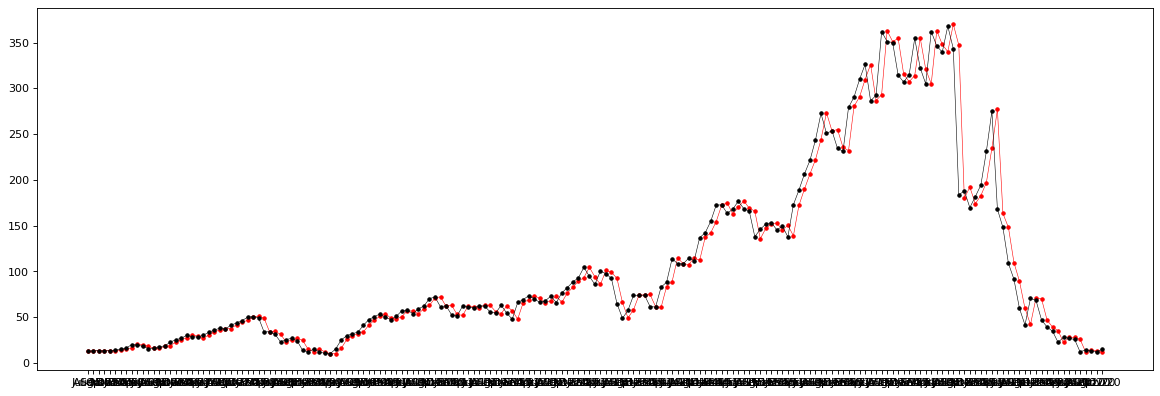

In [131]:
fig = plt.figure(figsize=(18, 6), dpi=80)
plt.plot( 'Date', 'Open', data=YesBank_df, marker='.', color='red', linewidth=0.5)
plt.plot( 'Date', 'Close', data=YesBank_df, marker='.', color='black', linewidth=0.5)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## **Chart - 2**

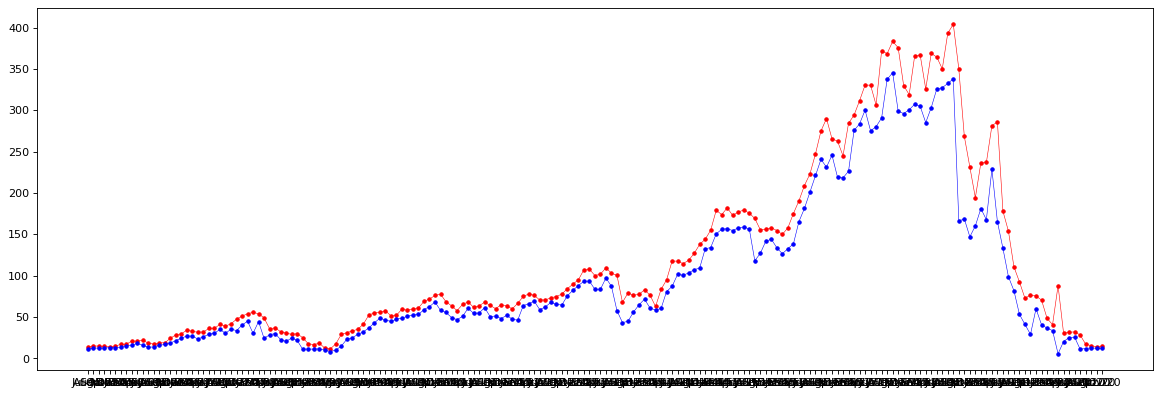

In [132]:
fig = plt.figure(figsize=(18, 6), dpi=80)
plt.plot( 'Date', 'High', data=YesBank_df, marker='.', color='red', linewidth=0.5)
plt.plot( 'Date', 'Low', data=YesBank_df, marker='.', color='blue', linewidth=0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## **Chart - 3**

In [133]:
YesBank_df.skew(axis = 1, skipna = True)

<ipython-input-133-9e4256bf65e3>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



0     -0.253807
1      1.296154
2      0.495575
3      1.088047
4      0.000000
         ...   
180    0.069940
181    0.961512
182    0.535863
183    0.441802
184    0.005410
Length: 185, dtype: float64

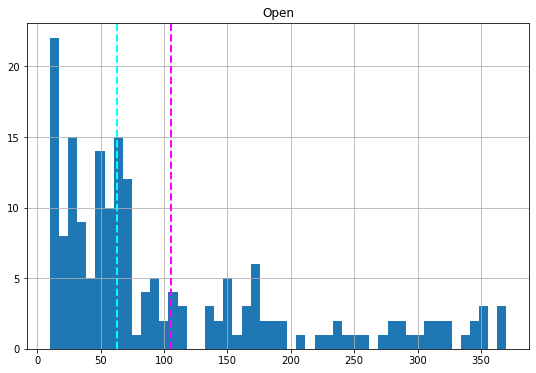

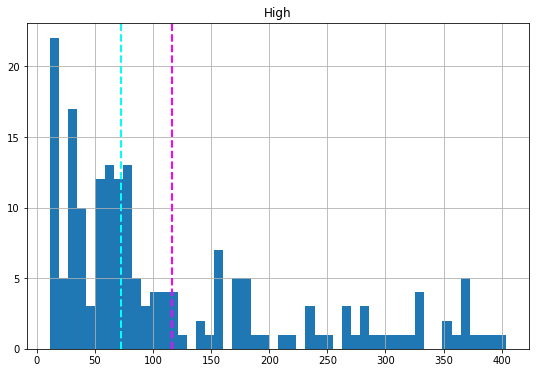

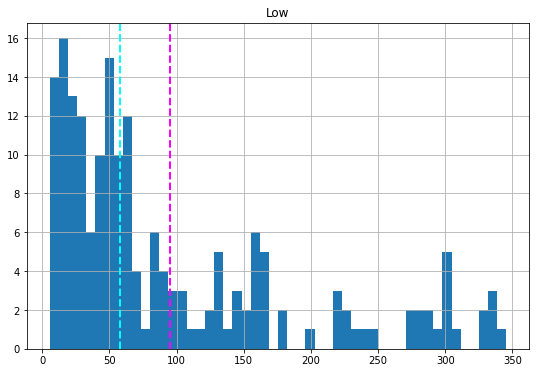

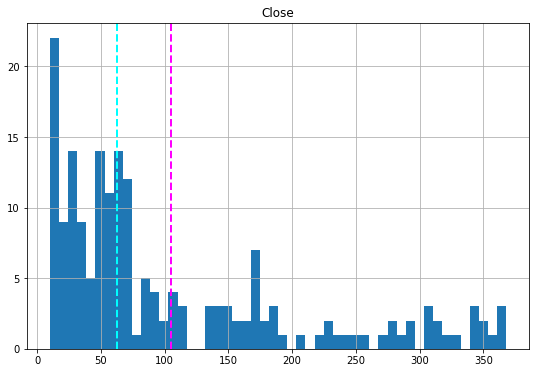

In [134]:
# Check for skewness in the dataset

numeric_features = YesBank_df.describe().columns
for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = YesBank_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## **Chart - 4**

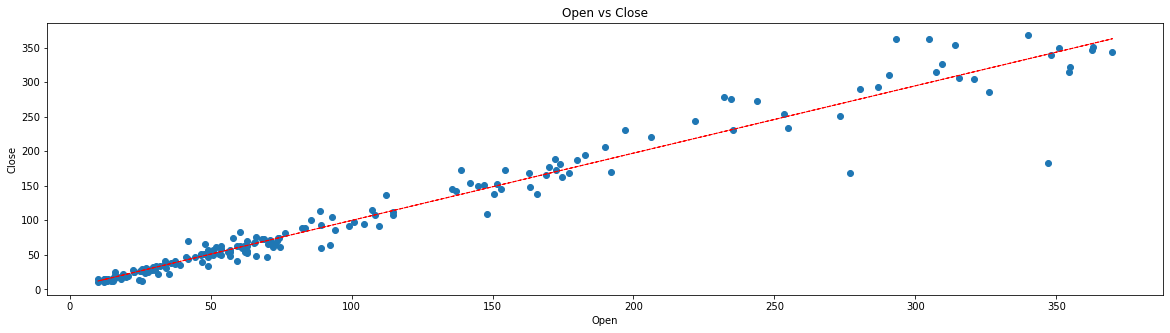

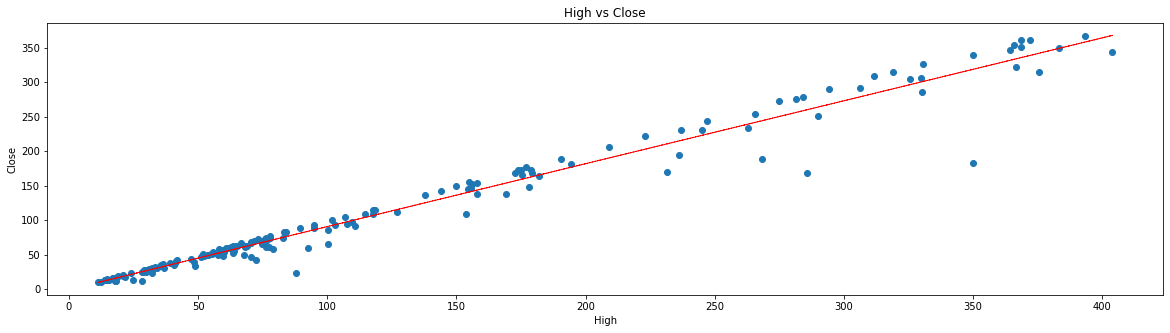

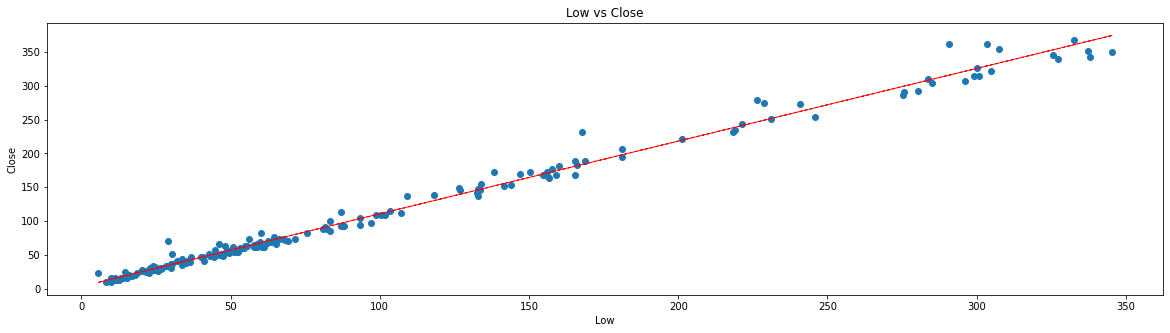

In [135]:
# scatter plot to see the relationship between dependent & independent variables
for col in YesBank_df.describe().columns[:-1]:
  fig = plt.figure(figsize=(20,5))
  ax = fig.gca()
  plt.scatter(YesBank_df[col], YesBank_df['Close'])
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('{} vs Close'.format(col))
  z = np.polyfit(YesBank_df[col], YesBank_df['Close'], 1)
  y_hat = np.poly1d(z)(YesBank_df[col])
  plt.plot(YesBank_df[col], y_hat, "r--", lw=1)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## **Chart - 5**

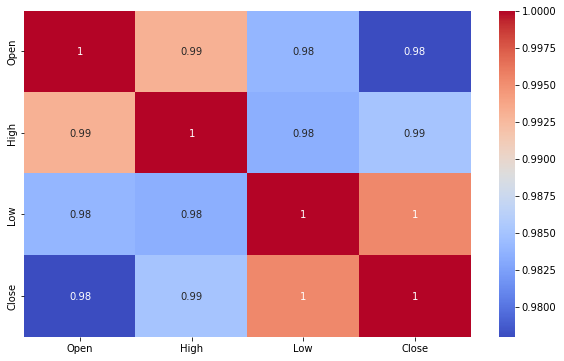

In [136]:
plt.figure(figsize=(10,6))
correlation = YesBank_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

## **Chart - 6**

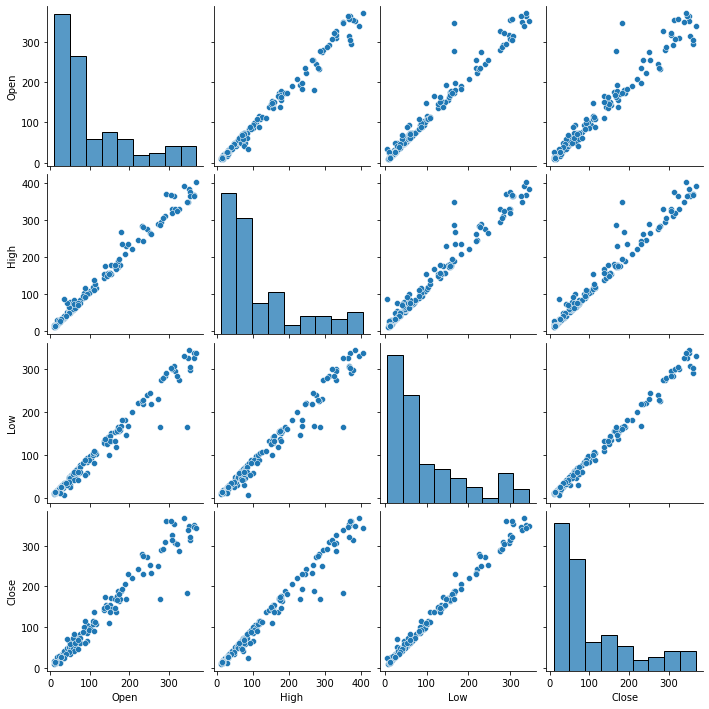

In [137]:
import seaborn as sns
# Pair Plot visualization code

cols = ['Open', 'High', 'Low', 'Close']
sns.pairplot(YesBank_df[cols], height = 2.5)

##### 1. Why did you pick the specific chart?

A Correlation Graph is a measurement between two sets of data or variables. It is mostly used in economics, statistics, and social science. It is used to measure relations or to see the differences between variables in a graph.



##### 2. What is/are the insight(s) found from the chart?

As we see in above chart closing price and lower price is highliy co related to each other.

## **Chart - 7**

In [138]:
#Plotting Open vs Close vs High 3d plot for better visualization

import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(YesBank_df, x='Date', y='Open', z='Close',
              color='High')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

# ***Hypothesis Testing***

## Hypothetical Statement - 1

**How it works?**

For Yes bank closing price prediction, let's assume:

Assumptions:

**Test-statistic**: An average closing price for Yes bank is X, i.e., μ (Population) = X.

**Null Hypothesis (H0)**: The average closing price for Yes bank is X.
Alternative Hypothesis (Ha) : The average closing price for Yes bank is different than X.

**Significance Level**: α = 0.05 (generally a low value)

*Sample statistic*: We take a sample of n days of Yes bank closing prices and find that the average closing price is Y.

We perform n experiments, and if probability of getting the sample statistic, given the average closing price is X, for n observations (p-value) is less than 0.05 we Reject the Null Hypothesis and Accept the Alternative Hypothesis, otherwise we do not Reject the Null Hypothesis.
p-value = P( μ (sample) ≠ X | H0 is True ).

### Stating our research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** :

"The predicted closing prices of Yes Bank stock using the linear regression model are not significantly different from the actual closing prices." 

**Alternative Hypothesis** :

"The predicted closing prices of Yes Bank stock using the linear regression model are significantly different from the actual closing prices." 

**Defining null hypothesis and alternate hypothesis.**

**H0:** μpredicted - μactual = 0

Where:

**μpredicted** = mean of predicted closing prices\
**μactual** = mean of actual closing prices

The equation form of the alternative hypothesis "The predicted closing prices of Yes Bank stock using the linear regression model are significantly different from the actual closing prices" would be:

**H1:** μpredicted - μactual ≠ 0

Where:

μpredicted = mean of predicted closing prices\
μactual = mean of actual closing prices

This is assuming that you are using a t-test, where the null hypothesis is that the means of the two groups (predicted and actual closing prices) are equal and the alternative hypothesis is that they are not equal.

**Significance Value** = 0.05 or 5%

###  Perform Statistical T-Test to obtain P-Value

In [139]:
import scipy.stats as stats
import statistics

In [140]:
#Calculating mean
Closecol = YesBank_df.iloc[:,4:5]
Close_mean = np.mean(Closecol)
Close_mean

Close    105.204703
dtype: float64

In [141]:
#calculating p_value

Close_sample = YesBank_df['Close'].sample(n=10, random_state=1)

In [142]:
# t_test
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(Close_sample,10)

In [143]:
print(round(p_value,3))

0.07


In [144]:
if p_value > 0.05:
  print("we are accepting null hypothesis")
else:
  print("we are rejecting null hypothesis")
  

we are accepting null hypothesis


conclusion

As the p-value is greater than the significance level i.e 0.07 > 0.05, we accept the null hypothesis and conclude that The predicted closing prices of Yes Bank stock using the linear regression model are not significantly different from the actual closing prices.

##### Why did you choose the specific statistical test?

In the context of Yes Bank Closing stock price prediction, a t-test can be used to evaluate the performance of a linear regression model, which is a common method used to predict stock prices. The regression model is used to fit a line to the historical data of the stock prices, and the t-test is used to determine whether the slope of the line (coefficient) is significantly different from zero.

The t-test is used to evaluate the significance of the predictor variable in the regression model, and a small p-value (typically < 0.05) indicates that the predictor variable is significantly related to the stock price, and hence it is useful in the model.

## Hypothetical Statement - 2

**Null Hypothesis** :

"The linear regression model used to predict the closing prices of Yes Bank stock is not a good fit for the data." 

**Alternative Hypothesis** :

"The linear regression model used to predict the closing prices of Yes Bank stock is a good fit for the data." 

Defining null hypothesis and alternate hypothesis.

**H0**: The linear regression model does not fit the data well.

**H1**: The linear regression model fits the data well.

### Perform an appropriate statistical test.

In [145]:
import scipy.stats as stats

In [146]:
#Calculating mean
Opencol = YesBank_df.iloc[:,4:5]
Open_mean = np.mean(Opencol)
Open_mean

Close    105.204703
dtype: float64

In [147]:
#calculating p_value

Open_sample = YesBank_df['Open'].sample(n=10, random_state=1)

In [148]:
# t_test
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(Open_sample,10)

In [149]:
print(round(p_value,3))

0.057


In [150]:
if p_value > 0.5:
  print(" We accept the Null Hypothesis\n i.e That is The linear regression model does not fit the data well.")
else: 
  print(" We reject the Null Hypothesis\n i.e The linear regression model fits the data well.") 
 

 We reject the Null Hypothesis
 i.e The linear regression model fits the data well.


##### Which statistical test have you done to obtain P-Value?

We used T-test to obtain the P-Value.

##### Why did you choose the specific statistical test?

The main reason to use the Ttest is that, the Dataset we are using to predict the closing price is a continous variable data and t test fits well while working with the  continous variables.

## Hypothetical Statement - 3

### State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis** :

"The linear regression model used to predict the closing prices of Yes Bank stock has a significant predictive power."



**Alternative Hypothesis** :

"The linear regression model used to predict the closing prices of Yes Bank stock does not have a significant predictive power." 



Defining null hypothesis and alternate hypothesis.

H0: β1 = 0

Where:\
β1 = the coefficient of the independent variable in the linear regression model.

H1: β1 ≠ 0

Where:\
 β1 = the coefficient of the independent variable in the linear regression model



### Perform an appropriate statistical test.

In [151]:
import statsmodels.api as sm

In [152]:
inde = sm.add_constant(YesBank_df.iloc[:,1:4:])

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [153]:
inde

const   Open   High    Low
0      1.0  13.00  14.00  11.25
1      1.0  12.58  14.88  12.55
2      1.0  13.48  14.87  12.27
3      1.0  13.20  14.47  12.40
4      1.0  13.35  13.88  12.88
..     ...    ...    ...    ...
180    1.0  25.60  28.30  11.10
181    1.0  12.00  17.16  11.85
182    1.0  14.30  15.34  12.75
183    1.0  13.30  14.01  12.11
184    1.0  12.41  14.90  12.21

[185 rows x 4 columns]

In [154]:
results = sm.OLS(YesBank_df.iloc[:,4], inde).fit()
A = np.identity(len(results.params))
A = A[1:,:]
print(results.f_test(A))

<F test: F=array([[12187.05615406]]), p=1.5995940052004147e-208, df_denom=181, df_num=3>


In [155]:
fres = results.f_test(A)
dir(fres)
F_stat_value = fres.fvalue
p_value = fres.pvalue

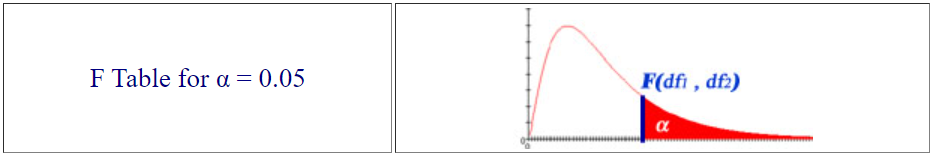\

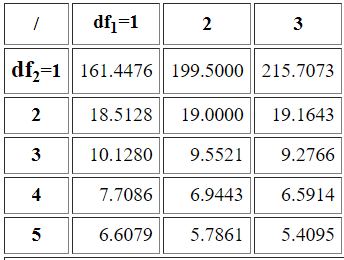\


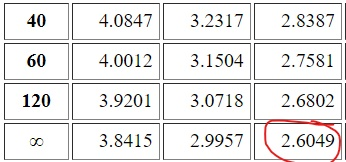


In [156]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.219e+04
Date:                Sat, 28 Jan 2023   Prob (F-statistic):          1.60e-208
Time:                        22:38:36   Log-Likelihood:                -619.85
No. Observations:                 185   AIC:                             1248.
Df Residuals:                     181   BIC:                             1261.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3228      0.768      1.723      0.0

In [157]:
if F_stat_value > 2.6049:
   print("we reject the null hypothesis\nThe linear regression model used to predict the closing prices of Yes Bank stock has a significant predictive power.")
else:
   print("we accept the null hypothesis\nThe linear regression model used to predict the closing prices of Yes Bank stock does not have a significant predictive power.")
  

we reject the null hypothesis
The linear regression model used to predict the closing prices of Yes Bank stock has a significant predictive power.


We can also confirm our Hypothesis by considering the p_value as shown below 

In [158]:
if p_value > 0.05:
  print("we accept the null hypothesis\nThe linear regression model used to predict the closing prices of Yes Bank stock does not have a significant predictive power.")
else:
  print("we reject the null hypothesis\nThe linear regression model used to predict the closing prices of Yes Bank stock has a significant predictive power.")
   
  

we reject the null hypothesis
The linear regression model used to predict the closing prices of Yes Bank stock has a significant predictive power.


Conclusion

We get an F-critical value of 2.6049 which is much lower than our F-statistic score of 12187.05615406. Since, F-statistic > F-critical we reject the null hypothesis, and similarly the p_value obtained i.e 1.5995940052004147e-208 which is < the significance value, this would indicate that the independent variable is a significant predictor of the dependent variable, and that the linear regression model has a significant predictive power.

##### Which statistical test have you done to obtain P-Value?

To obtain the P value  we used F-test.

##### Why did you choose the specific statistical test?

The critical value of an F-test is the value of the F-distribution that corresponds to a given level of significance, typically 0.05. If the calculated F-test statistic is greater than the critical value, then the null hypothesis is rejected, and it can be concluded that there is a significant difference in variances between the two or more samples.

In reality, our model is having multiple number of independent variables. This is where F-statistic comes into play.

F-statistic can be used to find the joint significance of multiple independent variables. It’s used to compare two model’s ability to explain the variance of the dependent variable. 


#Feature Engineering & Data Pre-processing

###1. Handling Missing Values

In [159]:
# Handling Missing Values & Missing Value Imputation
print(YesBank_df.isnull().sum())

Date        0
Open        0
High        0
Low         0
Close       0
date_new    0
Month       0
Year        0
dtype: int64


*  As we execute above code to detect a count of null value, we get outout as 0.
*  i.e No null value present in given dataset.

### 2. Handling Outliers

In [160]:
numerical_columns=list(YesBank_df.describe())
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

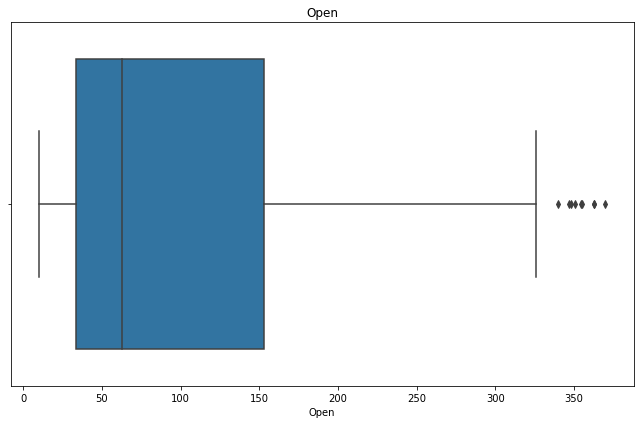

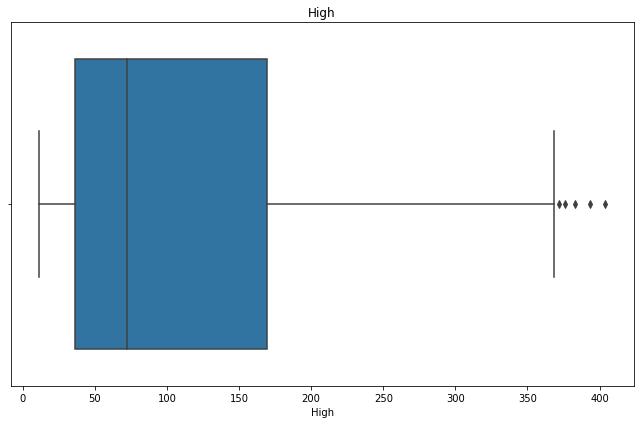

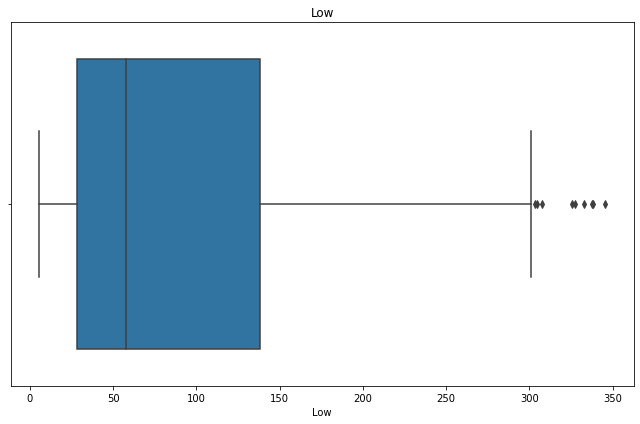

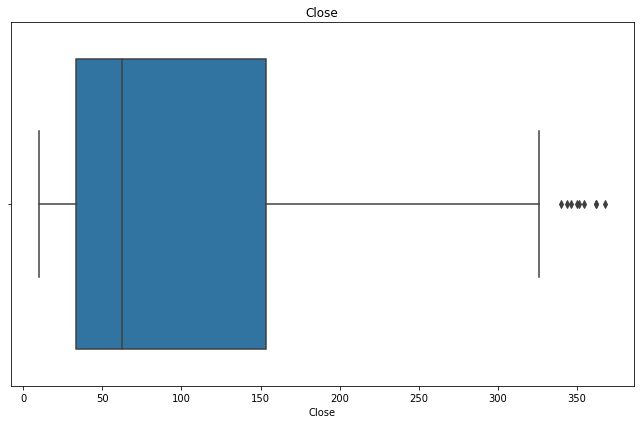

In [208]:
# Handling Outliers & Outlier treatments

for col in numerical_features:
  plt.figure(figsize=(9,6))
  sns.boxplot(x=YesBank_df[col])
  
  plt.title(col)
  plt.tight_layout()
  

plt.show()

As we execute above code we found that, given data set contain Close, Low, Open and High columns. which have neigligible outliers so, no action needed.

###3. Categorical Encoding

In [162]:
# Encoding categorical columns
categorical_columns=list(set(YesBank_df.columns.to_list()).difference(set(YesBank_df.describe().columns.to_list())))
print("Categorical Columns are :-", categorical_columns)

Categorical Columns are :- ['Month', 'Date', 'Year', 'date_new']


In [163]:
# Getting dictionaries for Label Encoding

year_list=sorted(list(YesBank_df["Year"].unique()))
dict3=dict(zip(year_list,range(len(year_list))))
dict3

{'2005': 0,
 '2006': 1,
 '2007': 2,
 '2008': 3,
 '2009': 4,
 '2010': 5,
 '2011': 6,
 '2012': 7,
 '2013': 8,
 '2014': 9,
 '2015': 10,
 '2016': 11,
 '2017': 12,
 '2018': 13,
 '2019': 14,
 '2020': 15}

###4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [164]:
from scipy.stats import pearsonr
# Manipulate Features to minimize feature correlation and create new features
list1 = YesBank_df['High']
list2 = YesBank_df['Close']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)
 

Pearsons correlation: 0.985


In [165]:
list1 = YesBank_df['Low']
list2 = YesBank_df['Close']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.995


In [166]:
list1 = YesBank_df['Open']
list2 = YesBank_df['Close']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.978


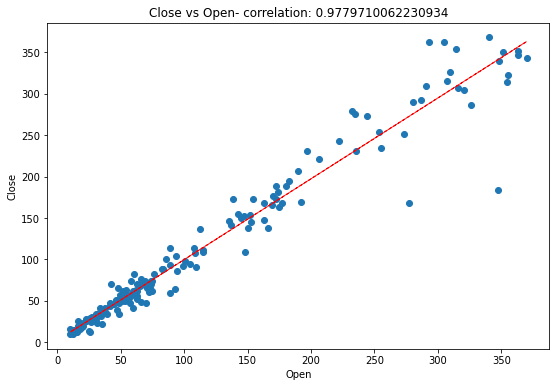

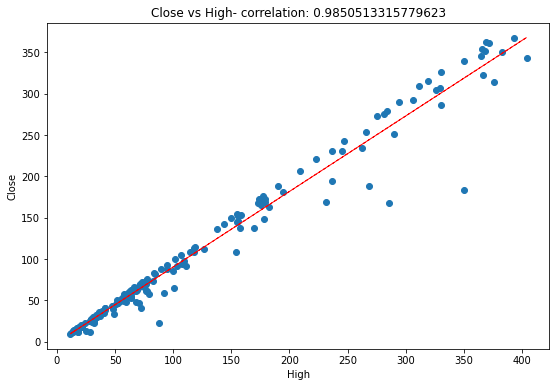

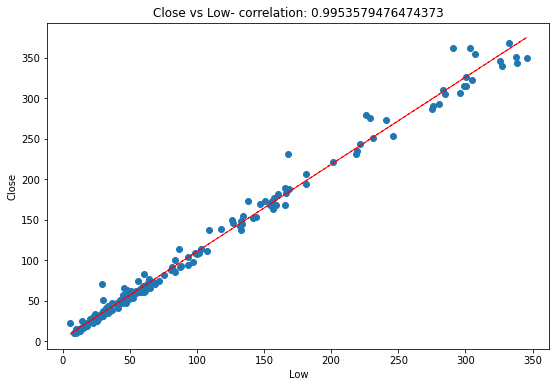

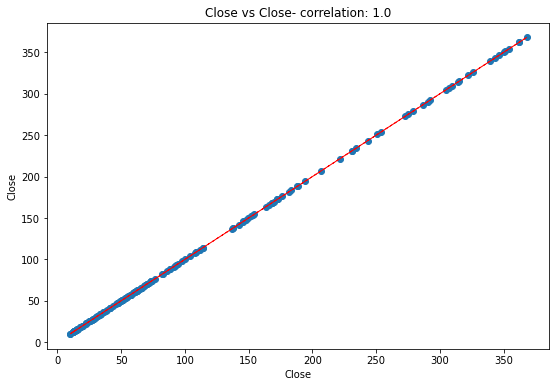

In [167]:
# scatter plot  on given data set

for col in numerical_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = YesBank_df[col]
    label = YesBank_df['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(YesBank_df[col], YesBank_df['Close'], 1)
    y_hat = np.poly1d(z)(YesBank_df[col])

    plt.plot(YesBank_df[col], y_hat, "r--", lw=1)

plt.show()

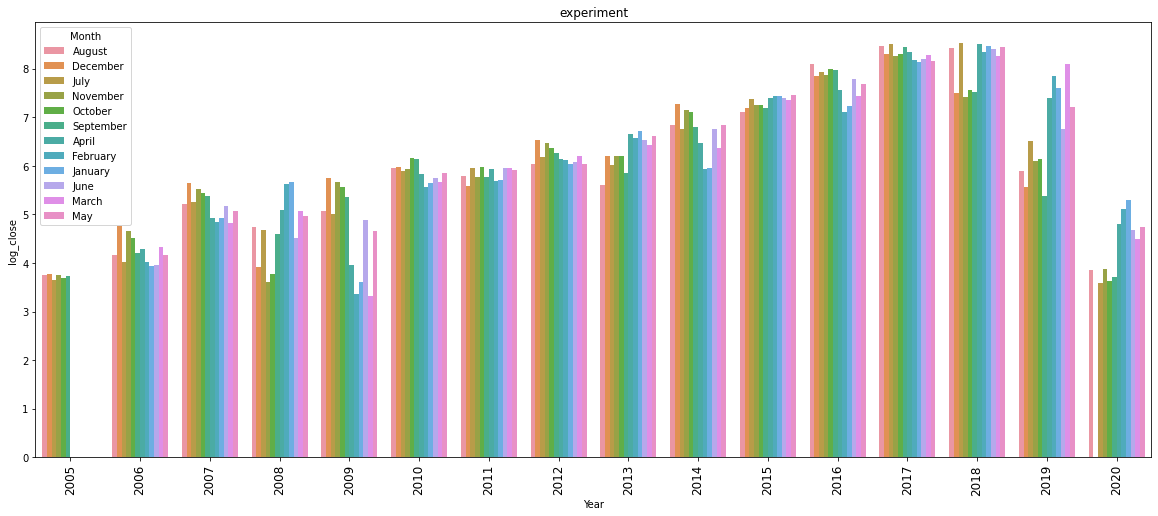

In [168]:
xyz = YesBank_df.groupby(['Year','Month'])[['Close']].sum().reset_index()

xyz['log_close'] = np.log2(xyz['Close'])

plt.figure(figsize=(20,8))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Year")
plt.ylabel("Close")
plt.title("experiment")
plotting=sns.barplot(x='Year',y='log_close', hue='Month', data=xyz);
plotting.set_xticklabels(plotting.get_xticklabels(), rotation=90, fontsize=12)
plt.show()


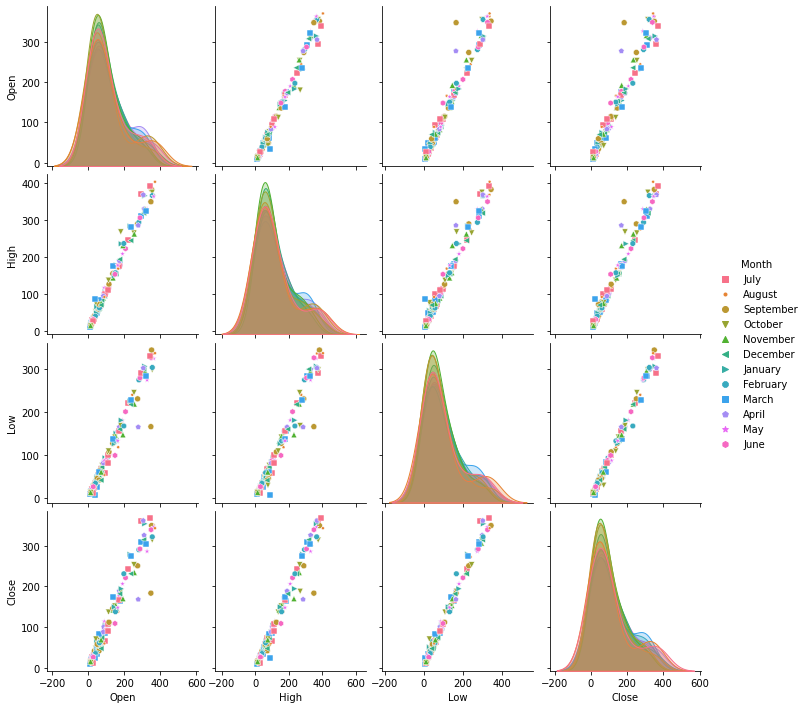

In [169]:
sns.pairplot(YesBank_df, hue="Month",markers=[',', '.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h'])


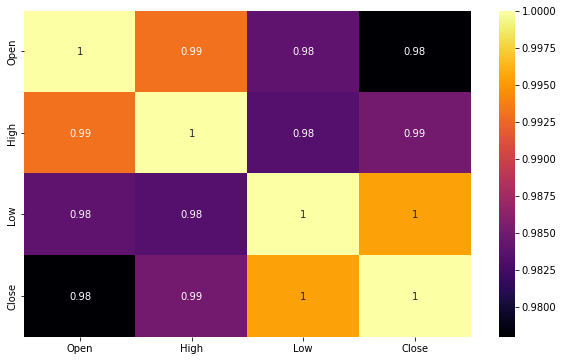

In [175]:
plt.figure(figsize=(10,6))
sns.heatmap(YesBank_df.corr(),cmap='inferno',annot=True)

##### What all feature selection methods have you used  and why?

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

#Model -1 **Linear Regression**

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [177]:
# Data splitting
X=df.iloc[:,1:4]  #independent column
y=df.iloc[:,4]    #dependent column

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

print("Shape of X_train dataset: ", x_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of X_test dataset: ", x_test.shape)
print("Shape of y_test dataset: ", y_test.shape)     

Shape of X_train dataset:  (148, 3)
Shape of y_train dataset:  (148,)
Shape of X_test dataset:  (37, 3)
Shape of y_test dataset:  (37,)


In [178]:
linear= LinearRegression()
lr_model=linear.fit(x_train, y_train) # Fitting the Algorithm

linear.score(x_train, y_train)
print("Train score :", linear.score(x_train, y_train))
linear.score(x_test, y_test)
print("Test score :", linear.score(x_test, y_test))
linear.coef_
print("Coefficient :", linear.coef_)


y_pred_train=linear.predict(x_train) # predicted test
y_pred_test=linear.predict(x_test) # predicted test

Train score : 0.4194524370513767
Test score : 0.48515966718114656
Coefficient : [ 0.01042343  0.05926119 -0.05123103]


In [179]:
# actual vs predicated value comparioins
actual_vs_predict=pd.DataFrame({"actual":y_test,"prediction": y_pred_test})
actual_vs_predict

actual   prediction
16    2006  2010.448924
179   2020  2010.445462
66    2011  2011.377504
40    2008  2010.200472
166   2019  2014.871493
155   2018  2017.110840
97    2013  2011.905576
177   2020  2010.650029
35    2008  2010.582906
54    2010  2011.147799
116   2015  2014.048941
56    2010  2010.787372
4     2005  2009.896648
149   2017  2016.379791
81    2012  2011.293750
31    2008  2011.032975
47    2009  2010.567072
126   2016  2013.556320
106   2014  2013.294345
105   2014  2012.002062
48    2009  2010.620035
11    2006  2010.160905
108   2014  2012.359491
78    2012  2011.860629
117   2015  2013.668502
14    2006  2010.044767
42    2009  2010.220481
29    2007  2011.008079
19    2007  2010.451526
82    2012  2011.450636
164   2019  2017.409657
154   2018  2018.111601
102   2014  2011.645905
136   2016  2016.380562
93    2013  2012.398026
53    2009  2010.960138
132   2016  2015.439851

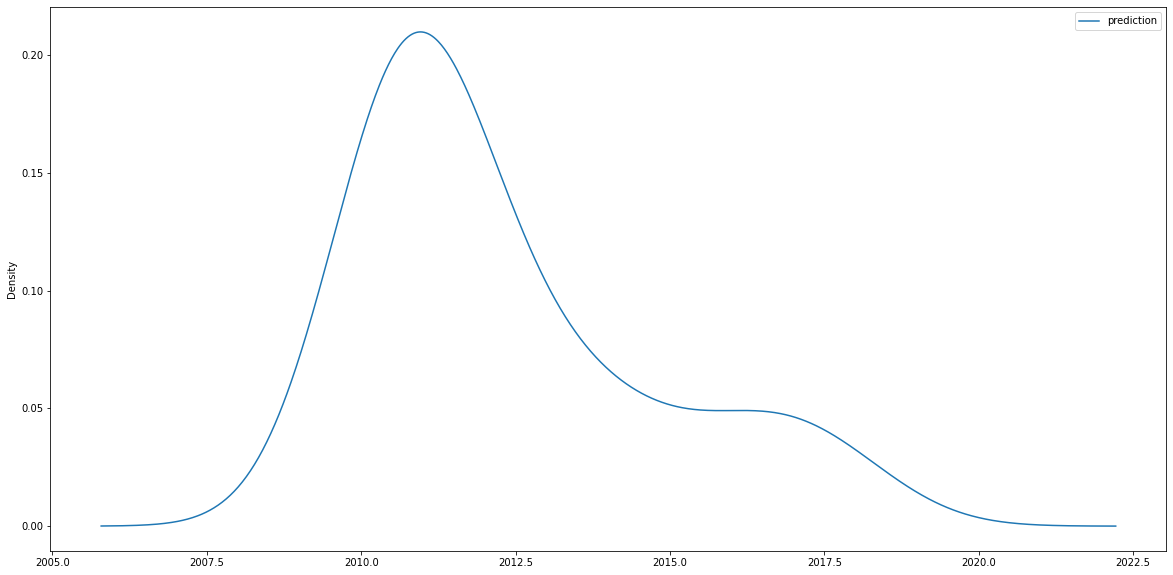

In [180]:
actual_vs_predict.plot(kind="kde",figsize=(20,10), subplots= "True")
plt.show()

###1. Explaining the ML Model used and it's performance using Evaluation metric Score Chart.


In [181]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [182]:
linear_mse= mean_squared_error((y_train), (y_pred_train))
print("MSE :",linear_mse)
linear_RMSE=np.sqrt(linear_mse)
print("RMSE :",linear_RMSE)
linear_mae= mean_absolute_error(y_train, y_pred_train)
print("MAE :",linear_mae)
linear_r2= r2_score(y_train, y_pred_train)
print("R2 :",linear_r2)
linear_Adjusted_R2= 1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",linear_Adjusted_R2)

MSE : 11.639655286121544
RMSE : 3.411693902758796
MAE : 2.4339745369782997
R2 : 0.4194524370513767
Adjusted R2 : 0.3666753858742292


###2. Cross- Validation & Hyperparameter Tuning

In [183]:
# Hyperparameter tunning
parameter={'fit_intercept':[True,False], 'copy_X':[True,False], 'n_jobs':[1,2,3,4,5,6,7,8,9,10,11,12], 'positive':[True,False]} 

# Hyperparameter optimization using GridSearch CV
rsc_linear=GridSearchCV(linear,param_grid=parameter,cv=5,scoring='neg_mean_absolute_error')

# Fitting the Algorithm
rsc_linear.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'positive': [True, False]},
             scoring='neg_mean_absolute_error')

In [184]:
# Getting R2 score
y_pred_rsc=rsc_linear.predict(x_test)
r2_score(y_pred_rsc,y_test)

-0.8263554681210998

Used GridSearchCV to automate the tweaking of hyperparameters because doing it manually may take a lot of time and resources.

Findings:

*   R2(coefficient of determination) regression score function is 0.9938, using Evaluation metrics score chart.
*   After using cross validation hyperparameter i.e GridSearchCV, we got R2 score i.e. (coefficient of determination) regression score function is 0.9977




# Model - 2 **Lasso Regressor**

In [185]:
from sklearn.linear_model import Lasso

In [186]:
# Data splitting
p=YesBank_df.iloc[:,1:3] 
q=YesBank_df[["Close"]] 

p_train, p_test, q_train, q_test = train_test_split(p,q, test_size=0.2, random_state=1)
print("Shape of p_train dataset : ", p_train.shape)
print("Shape of q_train dataset : ", q_train.shape)
print("Shape of p_test dataset : ", p_test.shape)
print("Shape of q_test dataset : ", q_test.shape)

Shape of p_train dataset :  (148, 2)
Shape of q_train dataset :  (148, 1)
Shape of p_test dataset :  (37, 2)
Shape of q_test dataset :  (37, 1)


In [187]:
# Implementing Model

lasso = Lasso(alpha=0.01, max_iter=3000)
lasso.fit(p_train, q_train)  # Fitting the Algorithm

lasso.score(p_test, q_test)
print("Test score :", lasso.score(p_test, q_test))
lasso.score(p_train, q_train)
print("Train score :", lasso.score(p_train, q_train))
lasso.coef_
print("Coefficient :", lasso.coef_)    

q_pred_test_lasso=lasso.predict(p_test)   # predicted test
q_pred_train_lasso=lasso.predict(p_train)   # predicted test

Test score : 0.9891482752865322
Train score : 0.9655591029131632
Coefficient : [-0.05006089  0.94821501]


In [188]:
# Actual value and Predicated value
ab=q_test
ac=pd.DataFrame(q_pred_test_lasso.reshape(-1,1))
print("actual value") 
print(ab)
print("Predicted value") 
print(ac)

actual value
      Close
16    25.32
179   25.60
66    52.59
40    12.26
166  147.95
155  339.60
97    48.65
177   27.95
35    22.85
54    49.84
116  163.31
56    50.97
4     13.41
149  315.05
81    70.07
31    49.42
47    29.68
126  149.38
106  113.89
105   88.14
48    31.93
11    15.62
108  108.21
78    65.99
117  167.96
14    18.46
42    12.24
29    49.81
19    28.63
82    66.02
164  275.05
154  346.20
102   61.59
136  234.28
93   100.28
53    53.41
132  243.44
Predicted value
             0
0    25.509742
1    28.561728
2    56.752195
3    15.793275
4   160.310187
5   314.204333
6    60.649890
7    27.412238
8    28.644035
9    51.570405
10  163.479936
11   46.626611
12   12.148360
13  286.757331
14   68.129128
15   48.283514
16   27.844412
17  134.534049
18  106.720126
19   85.539329
20   29.611450
21   16.191497
22  102.760036
23   60.312829
24  155.357089
25   16.656652
26   16.280781
27   48.536234
28   29.055419
29   63.065659
30  254.644045
31  327.020404
32   68.310113
33  2

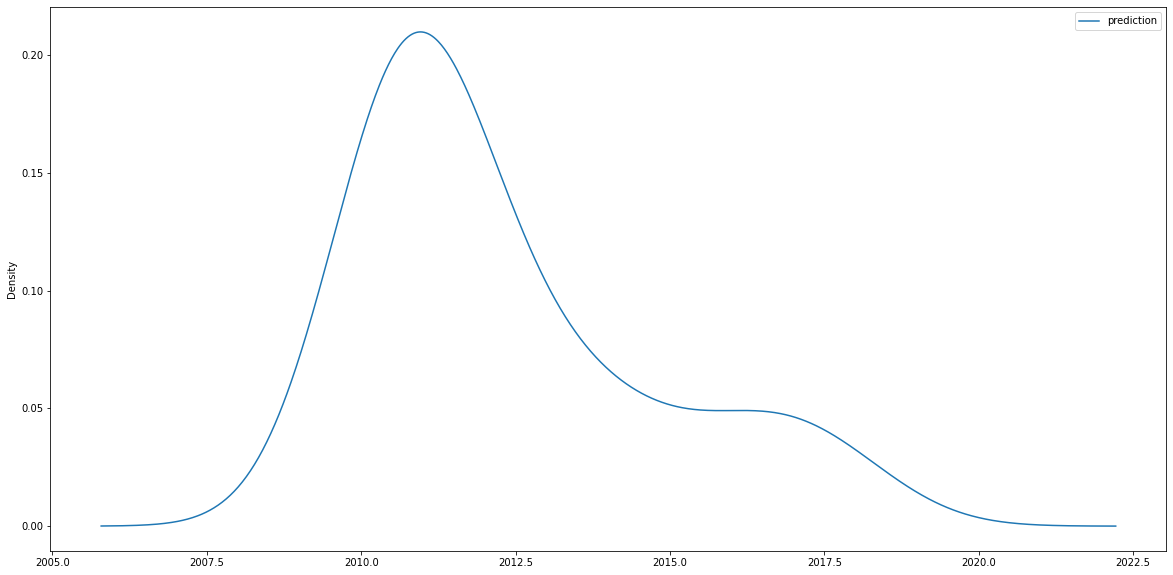

In [189]:
# Actual Value vs predicted value visualization
actual_vs_predict.plot(kind="kde",figsize=(20,10),subplots=True)
plt.show()

###1. Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [190]:
#Evaluating predictions

lasso_mse= mean_squared_error((q_train), (q_pred_train_lasso))
print("MSE :",lasso_mse)
lasso_RMSE=np.sqrt(lasso_mse)
print("RMSE :",lasso_RMSE)
MAE_l= mean_absolute_error(q_train, q_pred_train_lasso)
print("MAE :",MAE_l)
lasso_r2= r2_score(q_train, q_pred_train_lasso)
print("R2 :",lasso_r2)
lasso_adjusted_r2 = 1-(1-r2_score(q_train, q_pred_train_lasso))*((p_test.shape[0]-1)/(p_test.shape[0]-p_test.shape[1]-1))
print("Adjusted R2 :",lasso_adjusted_r2)


MSE : 336.0395975278305
RMSE : 18.331382859125235
MAE : 9.549745224909854
R2 : 0.9655591029131632
Adjusted R2 : 0.9635331677904081


###2. Cross- Validation & Hyperparameter Tuning

In [191]:
print(lasso.get_params().keys())

# Hyperparameter tunning
parameter={'alpha':[1.1,2.5,5.6,6.8,9.7], 'fit_intercept':[True,False], 'selection':['cyclic', 'random'], 'copy_X':[True,False]} 

# Hyperparameter optimization using GridSearch CV
rsc_lasso=GridSearchCV(lasso,param_grid=parameter,cv=5,scoring='neg_mean_absolute_error')

# Fitting the Algorithm
rsc_lasso.fit(p_train,q_train)


dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])


GridSearchCV(cv=5, estimator=Lasso(alpha=0.01, max_iter=3000),
             param_grid={'alpha': [1.1, 2.5, 5.6, 6.8, 9.7],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'selection': ['cyclic', 'random']},
             scoring='neg_mean_absolute_error')

In [192]:
# Predicting on the model
q_pred_rsc_lasso=rsc_lasso.predict(p_test)
r2_score(q_pred_rsc_lasso,q_test)

0.987907901460512

**Findings:**


*   R2(coefficient of determination) regression score function is 0.98, using Evaluation metrics score chart.


*   After using cross validation hyperparameter i.e GridSearchCV again, we got R2 score i.e. (coefficient of determination) regression score function is 0.99

R2 Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s) as our data set R2 score is 0.99
which means the predicted values are the nearly same as the actual values.\
which means the predicted values are the nearly same as the actual values.


# Model - 3 **Ridge Regression** 

In [193]:
from sklearn.linear_model import Ridge

In [194]:
# Model Implementation
ridge= Ridge(alpha=0.01)
ridge_model=ridge.fit(x_train,y_train) # Fitting the Algorithm

ridge.score(x_train, y_train)

ridge.coef_
print("Coefficient :", ridge.coef_)

# Predicting on the model
y_pred_train_ridge=ridge.predict(x_train)
y_pred_test_ridge=ridge.predict(x_test)

Coefficient : [ 0.01042339  0.05926118 -0.05123098]


In [195]:
# actual vs predicated value comparision using lasso model
actual_vs_predict_ridge=pd.DataFrame({"actual":y_test,"prediction": y_pred_test_ridge})
actual_vs_predict_ridge

actual   prediction
16    2006  2010.448924
179   2020  2010.445463
66    2011  2011.377504
40    2008  2010.200472
166   2019  2014.871492
155   2018  2017.110842
97    2013  2011.905576
177   2020  2010.650029
35    2008  2010.582906
54    2010  2011.147799
116   2015  2014.048942
56    2010  2010.787373
4     2005  2009.896649
149   2017  2016.379792
81    2012  2011.293750
31    2008  2011.032975
47    2009  2010.567072
126   2016  2013.556320
106   2014  2013.294345
105   2014  2012.002062
48    2009  2010.620035
11    2006  2010.160905
108   2014  2012.359491
78    2012  2011.860628
117   2015  2013.668502
14    2006  2010.044767
42    2009  2010.220481
29    2007  2011.008079
19    2007  2010.451527
82    2012  2011.450636
164   2019  2017.409656
154   2018  2018.111602
102   2014  2011.645905
136   2016  2016.380562
93    2013  2012.398026
53    2009  2010.960138
132   2016  2015.439852

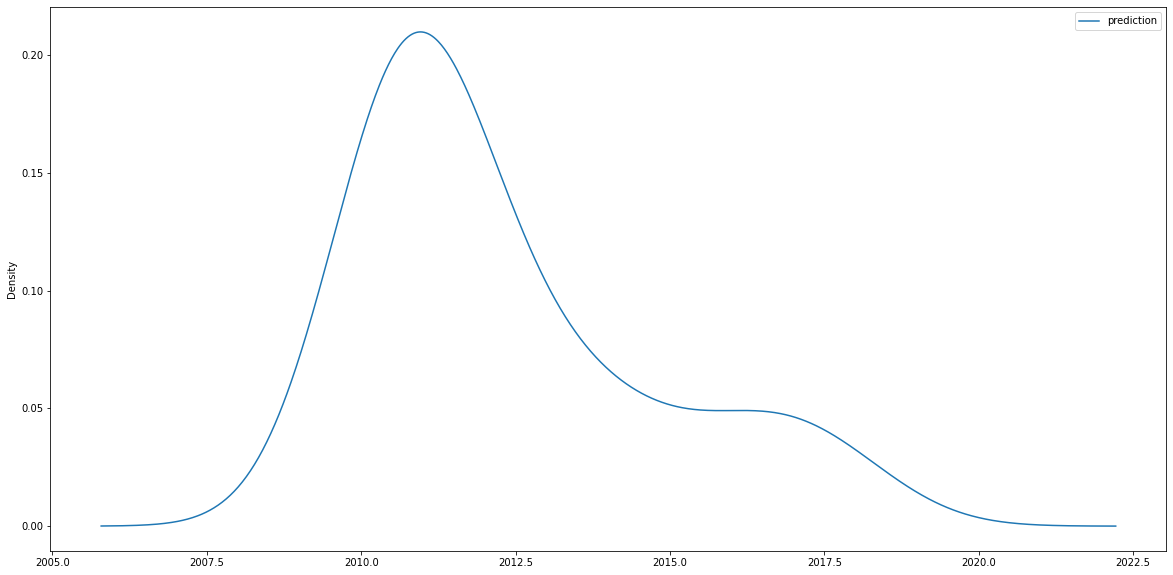

In [196]:
actual_vs_predict_ridge.plot(kind="kde",figsize=(20,10))
plt.show()

###1. Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [197]:
#Evaluating predictions

ridge_mse= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",ridge_mse)
ridge_RMSE=np.sqrt(ridge_mse)
print("RMSE :",ridge_RMSE)
ridge_mae= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",ridge_mae)
ridge_r2= r2_score(y_train, y_pred_train_ridge)
print("R2 :",ridge_r2)
ridge_Adjusted_R2= 1-(1-r2_score(y_train, y_pred_train_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 :",ridge_Adjusted_R2)

MSE : 11.639655286121743
RMSE : 3.411693902758825
MAE : 2.4339745274068005
R2 : 0.4194524370513668
Adjusted R2 : 0.36667538587421844


In [198]:
print(ridge.get_params().keys())

# Hyperparameter tunning
parameter={'max_iter':[1000,20000,50000,40000,130000,20000,8000], 'fit_intercept':[True,False], 'solver':['auto', 'svd','cholesky'], 'copy_X':[True,False]} 

# Hyperparameter optimization using GridSearch CV
rsc_ridge=GridSearchCV(ridge,param_grid=parameter,cv=5,scoring='neg_mean_absolute_error')

# Fitting the Algorithm
rsc_ridge.fit(x_train,y_train)

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'random_state', 'solver', 'tol'])


GridSearchCV(cv=5, estimator=Ridge(alpha=0.01),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 20000, 50000, 40000, 130000, 20000,
                                      8000],
                         'solver': ['auto', 'svd', 'cholesky']},
             scoring='neg_mean_absolute_error')

In [199]:
# Predicting on the model
y_pred_rsc_ridge=rsc_ridge.predict(x_test)
r2_score(y_pred_rsc_ridge,y_test)

-0.8263554116847249

**Findings:**


*   R2(coefficient of determination) regression score function is 0.9938, using Evaluation metrics score chart.

*   After using cross validation hyperparameter i.e GridSearchCV, we got R2 score i.e. (coefficient of determination) regression score function is 0.9977



#**Understanding model and feature importance using LIME**

In [200]:
!pip install lime
from lime import lime_tabular

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [201]:
explainer=lime_tabular.LimeTabularExplainer(training_data=np.array(x_train),
                                            mode='regression',
                                            feature_names=['Close','Open','High'],
                                            kernel_width=4,
                                            verbose=True,
                                            discretize_continuous=True,
                                            sample_around_instance=True,
                                            random_state=20,
                                      
                                            categorical_features=[1,2,3])

In [202]:
exp=explainer.explain_instance(data_row=x_test.iloc[3],
                               model_regressor=lasso,
                               num_features=50,
                               num_samples=5000,
                               predict_fn=linear.predict)
exp.show_in_notebook(show_predicted_value=True,predict_proba=True)

Intercept 2013.3445863507636
Prediction_local [2015.10298063]
Right: 2010.2004719057738


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [203]:
exp=explainer.explain_instance(data_row=x_test.iloc[3],
                               model_regressor=linear,
                               num_features=50,
                               num_samples=5000,
                               predict_fn=linear.predict)
exp.show_in_notebook(show_predicted_value=True,predict_proba=True)

Intercept 2013.1381261394952
Prediction_local [2010.20047191]
Right: 2010.2004719057738


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [204]:
exp=explainer.explain_instance(data_row=x_test.iloc[3],
                               model_regressor=ridge,
                               num_features=50,
                               num_samples=5000,
                               predict_fn=linear.predict)
exp.show_in_notebook(show_predicted_value=True,predict_proba=True)

Intercept 1574.6614473374193
Prediction_local [2007.66297829]
Right: 2004.8023663901588


In [205]:
exp.as_map()

{0: [(0, -744.3554335764182), (1, 286.0611895653634), (2, 25.292713062665467)],
 1: [(0, 744.3554335764182),
  (1, -286.0611895653634),
  (2, -25.292713062665467)]}

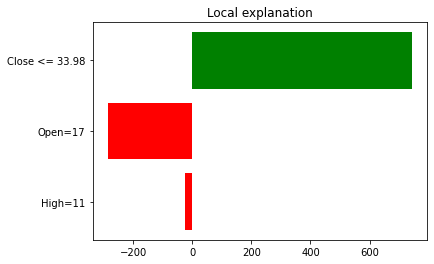

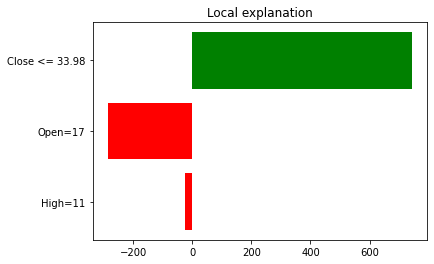

In [206]:
exp.as_pyplot_figure(label=4)